In [1]:
#import packages

import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#set base directory and point to downloaded Meta Kaggle csv files

base_directory = "C:/Users/llschers/OneDrive - Indiana University/Documents/GitHub/Envisioning-Kaggle/Meta-Kaggle_10-25-2021"
extension = 'csv'
os.chdir(base_directory)
meta_files = glob.glob('*.{}'.format(extension))
print(meta_files, len(meta_files))


['Competitions.csv', 'CompetitionTags.csv', 'Datasets.csv', 'DatasetTags.csv', 'DatasetVersions.csv', 'DatasetVotes.csv', 'Datasources.csv', 'EpisodeAgents.csv', 'Episodes.csv', 'ForumMessages.csv', 'ForumMessageVotes.csv', 'Forums.csv', 'ForumTopics.csv', 'KernelLanguages.csv', 'Kernels.csv', 'KernelTags.csv', 'KernelVersionCompetitionSources.csv', 'KernelVersionDatasetSources.csv', 'KernelVersionKernelSources.csv', 'KernelVersions.csv', 'KernelVotes.csv', 'Organizations.csv', 'Submissions.csv', 'Tags.csv', 'TeamMemberships.csv', 'Teams.csv', 'UserAchievements.csv', 'UserFollowers.csv', 'UserOrganizations.csv', 'Users.csv'] 30


In [3]:
#read in dfs and declare variables to select competition of interest

comps_df = pd.read_csv(base_directory+'/Competitions.csv', parse_dates=['DeadlineDate'])

### This is the line that is changes to select a competition ###

comp_title = "HuBMAP - Hacking the Kidney"
comp_overview = comps_df[comps_df.Title==comp_title]
comp_id = comp_overview.iloc[0]['Id']
comp_forum_id = comp_overview.iloc[0]['ForumId']
comp_overview


,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,CompetitionTypeId,HostName,EnabledDate,...,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions
3326,22990,hubmap-kidney-segmentation,HuBMAP - Hacking the Kidney,Identify glomeruli in human kidney tissue images,Research,995088.0,3760.0,1,NaN,11/16/2020 22:11:08,...,False,False,USD,60000.0,3,1.0,True,1200,1625,34699


In [4]:
### Also Add Important Comp Dates! ### 

important_dates_df = pd.DataFrame(data={'event_title': ['Begin 11/16/2020', 'Data Update 03/09/2021','Team Merger Deadline 05/03/2021', 'End 05/10/2021'], 'date': [pd.to_datetime('11/16/2020'), pd.to_datetime('03/09/2021'), pd.to_datetime('05/03/2021'), pd.to_datetime('05/10/2021')]})
important_dates_df

,event_title,date
0,Begin 11/16/2020,2020-11-16
1,Data Update 03/09/2021,2021-03-09
2,Team Merger Deadline 05/03/2021,2021-05-03
3,End 05/10/2021,2021-05-10


In [5]:
# inspect basic competition info

total_teams = comp_overview.TotalTeams
total_subs = comp_overview.TotalSubmissions

comp_overview

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,CompetitionTypeId,HostName,EnabledDate,...,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions
3326,22990,hubmap-kidney-segmentation,HuBMAP - Hacking the Kidney,Identify glomeruli in human kidney tissue images,Research,995088.0,3760.0,1,NaN,11/16/2020 22:11:08,...,False,False,USD,60000.0,3,1.0,True,1200,1625,34699


In [6]:
# find all teams for this competition

teams_df = pd.read_csv(base_directory+'/Teams.csv', infer_datetime_format=True)
#teams_df.head(20)
#teams_df.dtypes
comp_teams_df = teams_df[teams_df.CompetitionId==comp_id].dropna(subset=['LastSubmissionDate'])
comp_teams_df['TeamId'] = comp_teams_df['Id']
#comp_teams_df = teams_df[teams_df.CompetitionId==comp_id]
#comp_teams_df.head(5)
team_ids_list = comp_teams_df.Id.unique().tolist()
len(team_ids_list)


1216

In [7]:
comp_teams_df.head(10)

,Id,CompetitionId,TeamLeaderId,TeamName,ScoreFirstSubmittedDate,LastSubmissionDate,PublicLeaderboardSubmissionId,PrivateLeaderboardSubmissionId,IsBenchmark,Medal,MedalAwardDate,PublicLeaderboardRank,PrivateLeaderboardRank,TeamId
3614973,5838851,22990,3516796.0,Salman,NaN,04/07/2021,20348870.0,20348870.0,False,NaN,NaN,805.0,452.0,5838851
3615001,5838905,22990,2116404.0,Aman Arora,NaN,12/01/2020,18211765.0,18211765.0,False,NaN,NaN,866.0,553.0,5838905
3615008,5838923,22990,3891191.0,Nayu.T.S.,NaN,04/24/2021,20697186.0,20697186.0,False,NaN,NaN,795.0,493.0,5838923
3615011,5838928,22990,385905.0,Bo Peng,NaN,05/08/2021,20967146.0,20967146.0,False,3.0,05/18/2021,326.0,81.0,5838928
3615056,5838987,22990,299834.0,BIZEN,NaN,05/08/2021,20843148.0,20843148.0,False,NaN,NaN,256.0,1117.0,5838987
3615058,5838989,22990,2771882.0,Kazuhito00,NaN,02/24/2021,19711729.0,19711729.0,False,NaN,NaN,1161.0,866.0,5838989
3615078,5839019,22990,864684.0,Peter,NaN,11/26/2020,18299139.0,18299139.0,False,NaN,NaN,892.0,581.0,5839019
3615082,5839024,22990,644036.0,Rob Mulla,NaN,05/09/2021,20982839.0,20986031.0,False,NaN,NaN,447.0,450.0,5839024
3615110,5839066,22990,4064256.0,mcs-tachyon,NaN,05/10/2021,21002550.0,20998803.0,False,2.0,05/18/2021,165.0,21.0,5839066
3615111,5839067,22990,3460291.0,YujiAriyasu,NaN,12/04/2020,18261554.0,18261554.0,False,NaN,NaN,880.0,568.0,5839067


In [8]:
#create df of submissions that are part of the competition

submissions_df = pd.read_csv(base_directory+'/Submissions.csv', infer_datetime_format=True)
bool_sub_by_team_in_comp = submissions_df.TeamId.isin(team_ids_list)
subs_in_comp_df = submissions_df[bool_sub_by_team_in_comp]

#filter out those after deadline

subs_in_comp_df = subs_in_comp_df[subs_in_comp_df.IsAfterDeadline==False]
subs_in_comp_df.head(5)

C:\Users\llschers\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Id,SubmittedUserId,TeamId,SourceKernelVersionId,SubmissionDate,ScoreDate,IsAfterDeadline,PublicScoreLeaderboardDisplay,PublicScoreFullPrecision,PrivateScoreLeaderboardDisplay,PrivateScoreFullPrecision
7977327,18211765,2116404,5838905,47531414.0,11/23/2020,04/24/2021,False,0.0,0,0.0,0
7977328,18215715,2116404,5838905,47546410.0,11/23/2020,04/24/2021,False,0.0,0,0.0,0
7977329,18400127,2116404,5838905,48246825.0,12/01/2020,04/23/2021,False,0.0,0,0.0,0
7977330,18129418,2006644,5839405,47251592.0,11/19/2020,04/24/2021,False,0.0,0,0.0,0
7977331,18136688,2006644,5839405,47275557.0,11/20/2020,NaN,False,NaN,NaN,NaN,NaN


In [9]:
#plot number of teams over time

#get RequestDate by TeamId from TeamMemberships.csv
team_memberships_df = pd.read_csv(base_directory+'/TeamMemberships.csv', infer_datetime_format=True).dropna(subset=['RequestDate'])
team_memberships_df['RequestDate'] = pd.to_datetime(team_memberships_df.RequestDate)
bool_team_mem_in_comp = team_memberships_df.TeamId.isin(team_ids_list)
team_mem_in_comp = team_memberships_df[bool_team_mem_in_comp].set_index('TeamId').drop(columns=['Id', 'UserId']).sort_values(by='RequestDate')
team_mem_in_comp['TeamNum'] = range(1, len(team_mem_in_comp)+1)
team_mem_by_date = team_mem_in_comp.groupby('RequestDate')
teams_so_far_by_date_df = team_mem_by_date.max()
teams_so_far_by_date_df
#dates = list(team_mem_by_date.groups.keys())
#dates



,TeamNum
RequestDate,
2020-11-16,19
2020-11-17,158
2020-11-18,184
2020-11-19,219
2020-11-20,245
...,...
2021-04-29,1486
2021-04-30,1515
2021-05-01,1537


In [10]:
#add in reduced teams after those who broke rules were dropped

#ended at 1,200 teams

teams_after_drop_df = pd.DataFrame(data={'RequestDate': [pd.to_datetime('05/04/2021'), pd.to_datetime('05/05/2021'), pd.to_datetime('05/06/2021'), pd.to_datetime('05/07/2021'), pd.to_datetime('05/08/2021'), pd.to_datetime('05/09/2021'), pd.to_datetime('05/10/2021')], 'TeamNum': [1200, 1200, 1200, 1200, 1200, 1200, 1200]})

teams_so_far_by_date_df.columns = [''.join(col) for col in teams_so_far_by_date_df.columns.values]
teams_so_far_by_date_df = teams_so_far_by_date_df.reset_index()
teams_so_far_by_date_df.sort_values(by=['RequestDate'])
teams_so_far_by_date_df = teams_so_far_by_date_df.append(teams_after_drop_df, ignore_index=True)

teams_so_far_by_date_df

,RequestDate,TeamNum
0,2020-11-16,19
1,2020-11-17,158
2,2020-11-18,184
3,2020-11-19,219
4,2020-11-20,245
...,...,...
169,2021-05-06,1200
170,2021-05-07,1200
171,2021-05-08,1200
172,2021-05-09,1200


In [11]:
teams_after_drop_df

,RequestDate,TeamNum
0,2021-05-04,1200
1,2021-05-05,1200
2,2021-05-06,1200
3,2021-05-07,1200
4,2021-05-08,1200
5,2021-05-09,1200
6,2021-05-10,1200


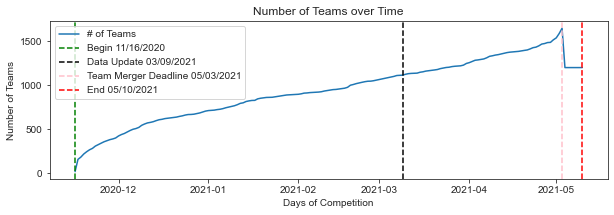

In [12]:
#plot Teams over Time
sns.set_style("ticks")
plt.figure(figsize=(10, 3))
plt.plot(teams_so_far_by_date_df.RequestDate, teams_so_far_by_date_df.TeamNum, label="# of Teams")
plt.title("Number of Teams over Time")
plt.xlabel("Days of Competition")
plt.ylabel("Number of Teams")

plt.draw()
# add vertical lines for critical dates
plt.axvline(x=important_dates_df.iloc[0]['date'], color='green', label=important_dates_df.iloc[0]['event_title'], linestyle='--')
plt.axvline(x=important_dates_df.iloc[1]['date'], color='black', label=important_dates_df.iloc[1]['event_title'], linestyle='--')
plt.axvline(x=important_dates_df.iloc[2]['date'], color='pink', label=important_dates_df.iloc[2]['event_title'], linestyle='--')
plt.axvline(x=important_dates_df.iloc[3]['date'], color='red', label=important_dates_df.iloc[3]['event_title'], linestyle='--')

plt.subplots_adjust(bottom=0.15)#adjusts plot so x label isn't cut off

plt.legend()

plt.savefig('Teams over Time.png')

plt.show()
plt.close()

In [13]:
#plot top scores over time

#aggregate subs_in_comp_df by SubmissionDate
subs_in_comp_df = subs_in_comp_df.groupby('SubmissionDate')

x = pd.to_datetime(list(subs_in_comp_df.groups.keys()))
y_public = subs_in_comp_df.max('PublicScoreFullPrecision')
y_private = subs_in_comp_df.max('PrivateScoreFullPrecision')

plt.show()
plt.close()

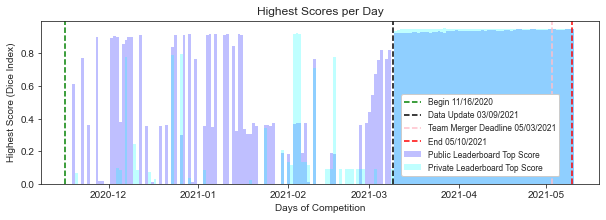

In [14]:
#plot max PublicScoreLeaderboardDisplay and PrivateScoreLeaderboardDisplay for each SubmissionDate

plt.figure(figsize=(10, 3))
plt.bar(x, list(y_public['PublicScoreLeaderboardDisplay']), label="Public Leaderboard Top Score", alpha=0.25, color='blue', 
       linewidth=0, width=1)
plt.bar(x, list(y_private['PrivateScoreLeaderboardDisplay']), label="Private Leaderboard Top Score", alpha=0.25, color='cyan',
       linewidth=0, width=1)

plt.title("Highest Scores per Day")
plt.xlabel("Days of Competition")
plt.ylabel("Highest Score (Dice Index)")

# add vertical lines for critical dates
plt.axvline(x=important_dates_df.iloc[0]['date'], color='green', label=important_dates_df.iloc[0]['event_title'], linestyle='--')
plt.axvline(x=important_dates_df.iloc[1]['date'], color='black', label=important_dates_df.iloc[1]['event_title'], linestyle='--')
plt.axvline(x=important_dates_df.iloc[2]['date'], color='pink', label=important_dates_df.iloc[2]['event_title'], linestyle='--')
plt.axvline(x=important_dates_df.iloc[3]['date'], color='red', label=important_dates_df.iloc[3]['event_title'], linestyle='--')
plt.legend(loc=(.645,0.05), fontsize='small', framealpha=1)
plt.savefig('Highest Scores per Day Overlapping Bar.png')
plt.show()
plt.close()

In [15]:
# need to add number of messages over time to plot of teams over time
forums_df = pd.read_csv(base_directory+'/Forums.csv', infer_datetime_format=True)
forums_topics_df = pd.read_csv(base_directory+'/ForumTopics.csv', infer_datetime_format=True)
forums_messages_df = pd.read_csv(base_directory+'/ForumMessages.csv', infer_datetime_format=True)
forums_df.head()

,Id,ParentForumId,Title
0,28105,1023.0,NSE_Auto_Index_09_13
1,28112,1023.0,NSE_Auto_Index_2009to13
2,28169,1023.0,SFPD Traffic stop data 2017
3,28173,1023.0,MAL Manga Adaptation Ratings
4,28180,1023.0,mediumedatest


In [16]:
comp_forums_df = forums_df[forums_df.Id==comp_forum_id]
comp_forums_topics_df = forums_topics_df[forums_topics_df.ForumId==comp_forum_id]



In [17]:
#have to filter by forum topic
topic_ids = list(comp_forums_topics_df.Id.unique())
#topic_ids



In [18]:
comp_forums_messages_df = forums_messages_df[forums_messages_df.ForumTopicId.isin(topic_ids)].set_index('Id').drop(columns=['ForumTopicId', 'PostUserId', 'ReplyToForumMessageId', 'Message', 'Medal', 'MedalAwardDate']).sort_values(by='PostDate')
comp_forums_messages_df.head(5)



,PostDate
Id,
1134223,01/01/2021 02:39:07
1134242,01/01/2021 03:54:55
1134274,01/01/2021 05:05:48
1134298,01/01/2021 05:39:55
1134356,01/01/2021 07:38:41


In [19]:

comp_forums_messages_df['PostDate'] = pd.to_datetime(comp_forums_messages_df.PostDate)
comp_forums_messages_df = comp_forums_messages_df.sort_values(by=['PostDate'])
comp_forums_messages_df['MessageNum'] = range(1, len(comp_forums_messages_df)+1)
num_messages_by_date = comp_forums_messages_df.groupby('PostDate')
num_messages_by_date_df = num_messages_by_date.max().reset_index()
num_messages_by_date_df['PostDate'] = pd.to_datetime(num_messages_by_date_df.PostDate).dt.date
num_messages_by_date_df

,PostDate,MessageNum
0,2020-11-16,1
1,2020-11-16,2
2,2020-11-16,3
3,2020-11-16,4
4,2020-11-16,5
...,...,...
2948,2021-07-08,2953
2949,2021-08-29,2954
2950,2021-10-14,2955
2951,2021-10-15,2956


In [20]:
# x is PostDate
# y is cumulative number of messages
message_x = num_messages_by_date_df['MessageNum']
message_y = num_messages_by_date_df.PostDate
message_y

0       2020-11-16
1       2020-11-16
2       2020-11-16
3       2020-11-16
4       2020-11-16
           ...    
2948    2021-07-08
2949    2021-08-29
2950    2021-10-14
2951    2021-10-15
2952    2021-10-16
Name: PostDate, Length: 2953, dtype: object

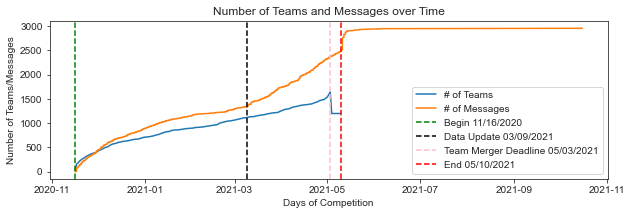

In [21]:
#plot Teams over Time
sns.set_style("ticks")
plt.figure(figsize=(10, 3))
plt.plot(teams_so_far_by_date_df.RequestDate, teams_so_far_by_date_df.TeamNum, label="# of Teams")
plt.plot(message_y, message_x, label="# of Messages")
plt.title("Number of Teams and Messages over Time")
plt.xlabel("Days of Competition")
plt.ylabel("Number of Teams/Messages")

plt.draw()
# add vertical lines for critical dates
plt.axvline(x=important_dates_df.iloc[0]['date'], color='green', label=important_dates_df.iloc[0]['event_title'], linestyle='--')
plt.axvline(x=important_dates_df.iloc[1]['date'], color='black', label=important_dates_df.iloc[1]['event_title'], linestyle='--')
plt.axvline(x=important_dates_df.iloc[2]['date'], color='pink', label=important_dates_df.iloc[2]['event_title'], linestyle='--')
plt.axvline(x=important_dates_df.iloc[3]['date'], color='red', label=important_dates_df.iloc[3]['event_title'], linestyle='--')

plt.subplots_adjust(bottom=0.15)#adjusts plot so x label isn't cut off

plt.legend()

plt.savefig('Teams and Messages over Time.png')

plt.show()